# Student Performances

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [65]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [67]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [68]:
x_value = df [['reading score', 'writing score']]
y_value = df [['math score']]
print(x_value)

     reading score  writing score
0               72             74
1               90             88
2               95             93
3               57             44
4               78             75
..             ...            ...
995             99             95
996             55             55
997             71             65
998             78             77
999             86             86

[1000 rows x 2 columns]


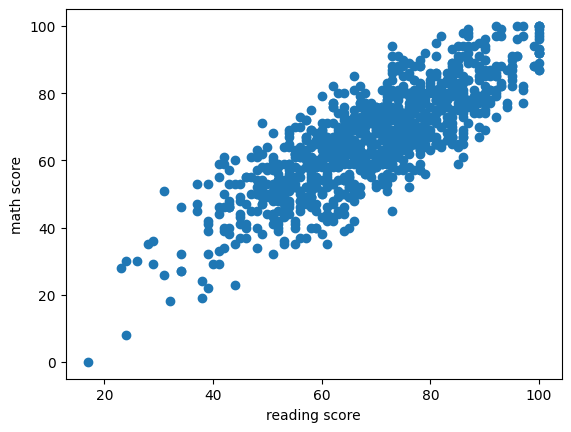

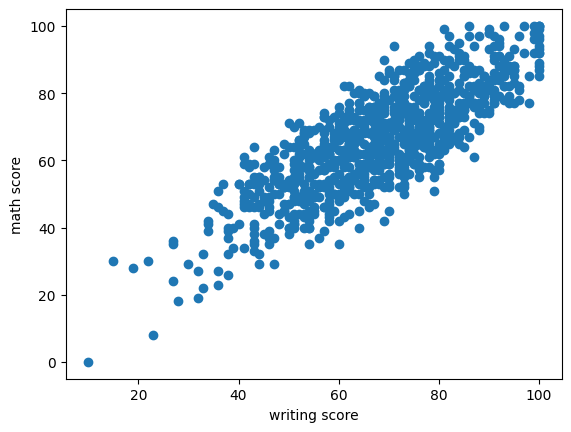

In [69]:
plt.scatter(df['reading score'], df['math score'])
plt.xlabel("reading score")
plt.ylabel("math score")
plt.show()

plt.scatter(df['writing score'], df['math score'])
plt.xlabel("writing score")
plt.ylabel("math score")
plt.show()

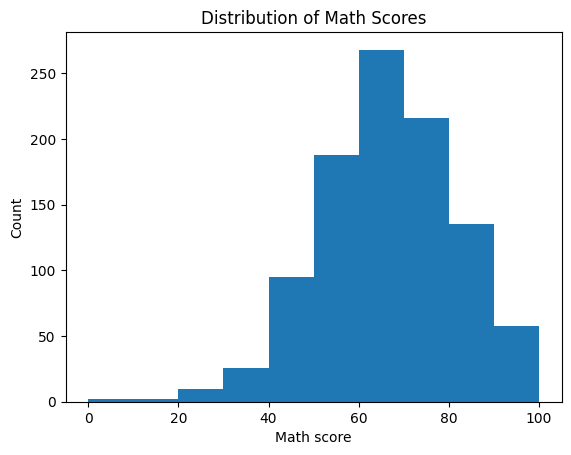

In [70]:
plt.hist(df["math score"], bins=10)
plt.xlabel("Math score")
plt.ylabel("Count")
plt.title("Distribution of Math Scores")
plt.show()

In [82]:
X = df[["reading score", "writing score"]]

y = df["math score"]

y = np.reshape(y, (1000,-1))
print(X.shape)
print(y.shape)

(1000, 2)
(1000, 1)


In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_value, y_value,
    test_size= 0.2,
    random_state= 42
)
print("Train", x_train.shape, y_train.shape)
print("Test", x_test.shape, y_test.shape)

Train (800, 2) (800, 1)
Test (200, 2) (200, 1)


In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.57555997 0.27176146]]
Intercept: [7.85940589]


In [85]:
y_pred = model.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[[80.18552589]
 [65.6849504 ]
 [69.44210877]
 [72.01611012]
 [76.82827724]]
     math score
521          91
737          53
740          80
660          74
411          84


In [86]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2", r2)
print("MSE ", mse)
print("RMSE ", rmse)

R^2 0.6825697127424625
MSE  77.24297821278957
RMSE  8.788798451027851


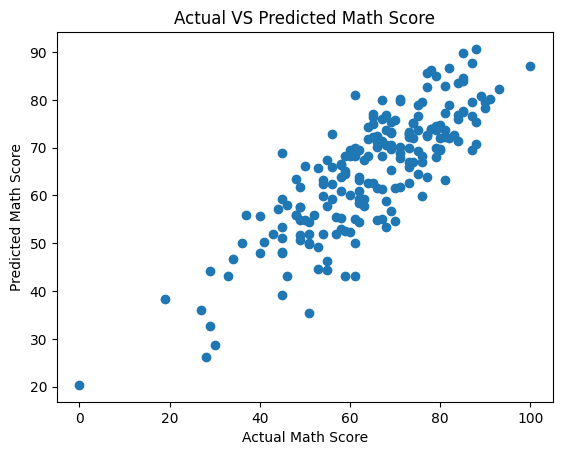

In [87]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual VS Predicted Math Score")
plt.show()

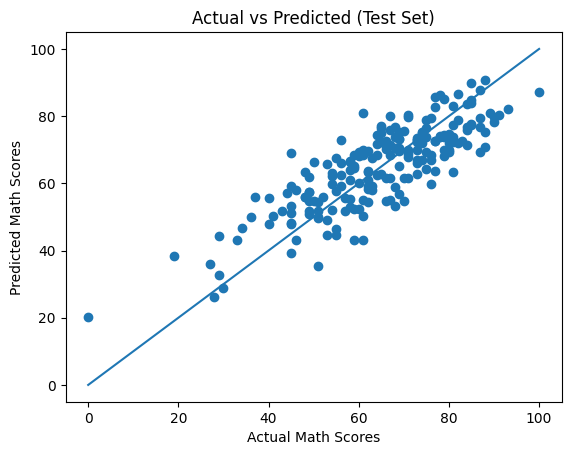

In [88]:
import numpy as np
import matplotlib.pyplot as plt

y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.scatter(y_test_arr, y_pred_arr)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted (Test Set)")
plt.show()
